# Facial Recognition On Olivetti Dataset

## Summary

In this study, face recognition was performed using the face images in the Olivetti data set. The steps for face recognition are as follows:

- Principal components of face images were obtained by PCA.
- Adequate number of principal components determined.
- According to three different classification models, accuracy score obtained.
- According to three different classification models, cross-validation accuracy score were obtained.
- Parameter optimization of the best model has been made.

## Face Recognition

The first study on automatic facial recognition systems was performed by Bledsoe between 1964 and 1966. This study was semi-automatic. The feature points on the face are determined manually and placed in the table called RAND. Then, a computer would perform the recognition process by classifying these points. However, a fully functional facial recognition application was performed in 1977 by Kanade. A feature-based approach was proposed in the study. After this date, two-dimensional (2D) face recognition have studied intensively. Three-dimensional (3D) face studies were started to be made after the 2000s.

3D facial recognition approaches developed in a different way than 2D facial recognition approaches. Therefore, it will be more accurate to categorize in 2D and 3D when discussing face recognition approaches.

We can classify the face recognition researches carried out with 2D approach in three categories; analytical (feature-based, local), global (appearance) and hybrid methods. While analytical approaches want to recognize by comparing the properties of the facial components, global approaches try to achieve a recognition with data derived from all the face. Hybrid approaches, together with local and global approaches, try to obtain data that expresses the face more accurately.

Face recognition performed in this kernel can assessed under global face recognition approaches.

In analytical approaches, the distance of the determined feature points and the angles between them, the shape of the facial features or the variables containing the regional features are obtained from the face image are used in face recognition. Analytical methods examine the face images in two different ways according to the pattern and geometrical properties. In these methods, the face image is represented by smaller size data, so the big data size problem that increases the computation cost in face recognition is solved.

Global-based methods are applied to face recognition by researchers because they perform facial recognition without feature extraction which is troublesome in feature based methods. Globally based methods have been used in face recognition since the 1990s, since they significantly improve facial recognition efficiency. Kirby and Sirovich (1990) first developed a method known as Eigenface, which is used in facial representation and recognition based on Principal Component Analysis . With this method, Turk and Pentland transformed the entire face image into vectors and computed eigenfaces with a set of samples. PCA was able to obtain data representing the face at the optimum level with the data obtained from the image. The different facial and illumination levels of the same person were evaluated as the weakness point of PCA.

The face recognition performend in this kernel totally based on Turk and Pentland work.

## Olivetti Dataset

Brief information about Olivetti Dataset:

- Face images taken between April 1992 and April 1994.
- There are ten different image of each of 40 distinct people
- There are 400 face images in the dataset
- Face images were taken at different times, variying ligthing, facial express and facial detail
- All face images have black background
- The images are gray level
- Size of each image is 64x64
- Image pixel values were scaled to [0, 1] interval
- Names of 40 people were encoded to an integer from 0 to 39

## Importing the relevant libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset

In [35]:
olivetti_data = fetch_olivetti_faces()
features = olivetti_data.data
targets = olivetti_data.target

In [36]:
print("There are {} images in total.".format(len(features)))
print("These images correspond to the total of {} people.".format(len(np.unique(targets))))
print("Size of each image is {}x{} pixels.".format(features.shape[1],features.shape[2]))

There are 400 images in total.
These images correspond to the total of 40 people.
Size of each image is 64x64 pixels.


## Printing faces of people in Olivetti Dataset

Text(0.5, 0.98, 'People in Olivetti Dataset')

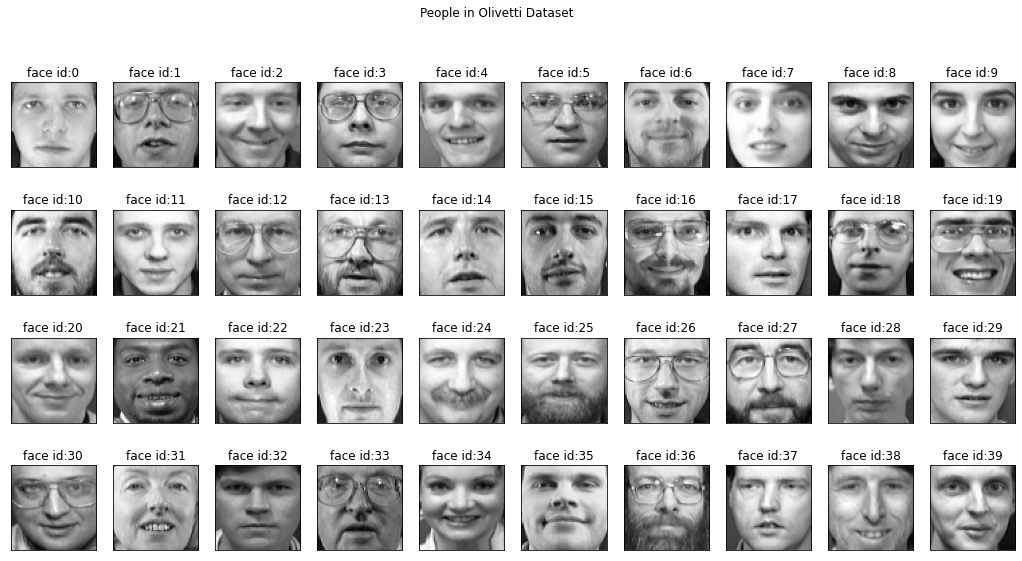

In [38]:
fig, sub_plots=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
sub_plots=sub_plots.flatten()

for unique_id in np.unique(targets):
    image_index=unique_id*10
    sub_plots[unique_id].imshow(features[image_index], cmap='gray')
    sub_plots[unique_id].set_xticks([])
    sub_plots[unique_id].set_yticks([])
    sub_plots[unique_id].set_title("face id:{}".format(unique_id))
    
plt.suptitle("People in Olivetti Dataset")

## All Face images of a single person

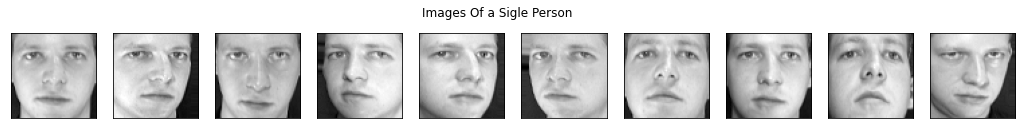

In [39]:
fig, sub_plots = plt.subplots(nrows = 1 , ncols = 10, figsize = (18,2))
sub_plots = sub_plots.flatten()

for i in range(10):
    sub_plots[i].imshow(features[i], cmap='gray')
    sub_plots[i].set_xticks([])
    sub_plots[i].set_yticks([])
    
plt.suptitle('Images Of a Sigle Person')
plt.show()

## Splitting the dataset into the Training set and Test set

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = features.reshape(features.shape[0],features.shape[1]*features.shape[2])
X.shape

(400, 4096)

The data set contains 10 face images for each subject. Of the face images, 70 percent will be used for training, 30 percent for testing. Uses stratify feature to have equal number of training and test images for each subject. Thus, there will be 7 training images and 3 test images for each subject. You can play with training and test rates.

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X, targets, test_size=0.3, stratify = targets, random_state = 42)

## Finding the Optimal Principal Components

In [43]:
from sklearn.decomposition import PCA

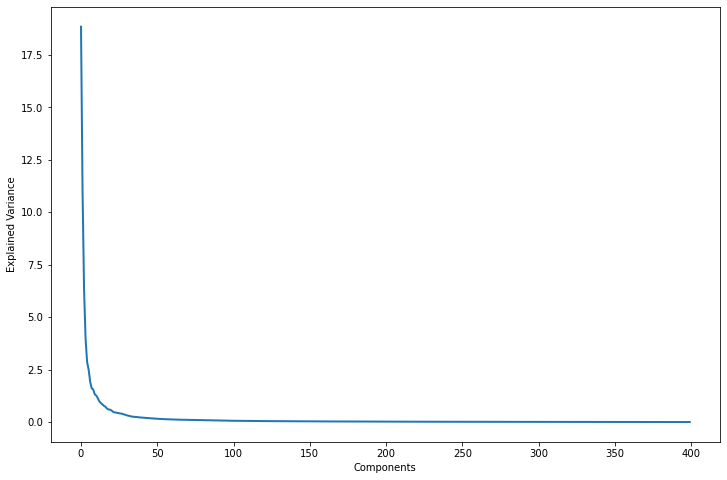

In [44]:
pca = PCA()
pca.fit(X)

plt.figure(1, figsize = (12,8))
plt.plot(pca.explained_variance_,linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

In [45]:
pca = PCA(n_components = 100, whiten = True)

In [46]:
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## The Eigen Faces

Text(0.5, 0.98, 'All Eigen Faces')

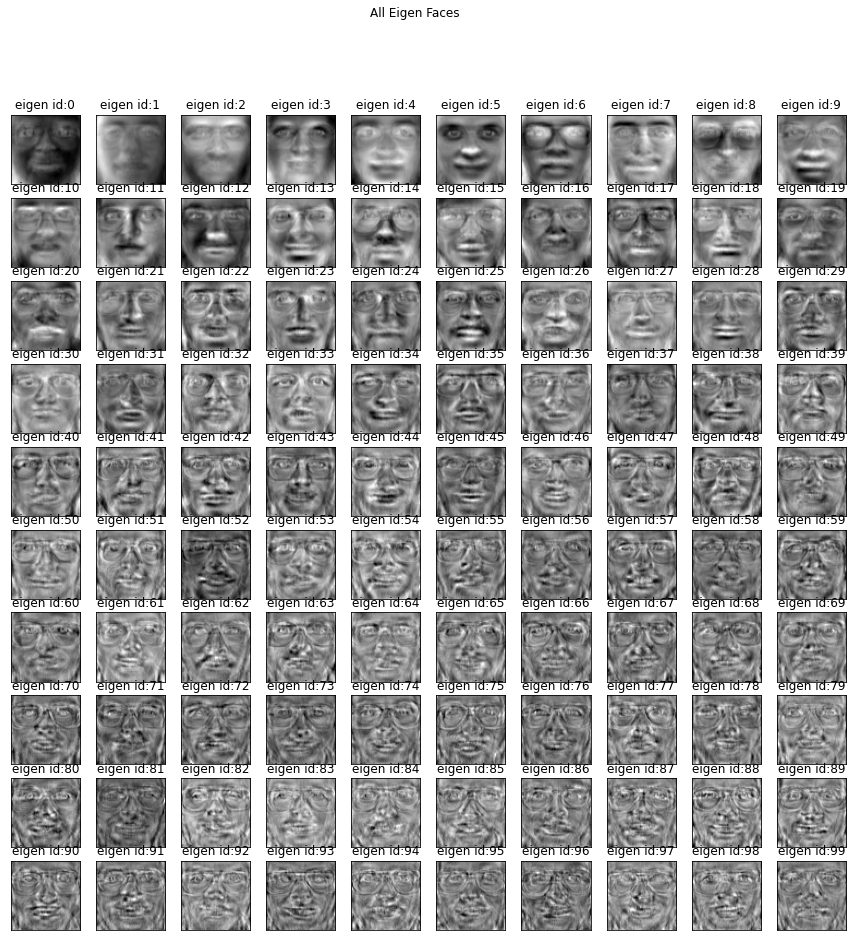

In [47]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, 64, 64))

fig, subplot=plt.subplots(nrows=10, ncols=10, figsize=(15,15))
subplot=subplot.flatten()
for i in range(number_of_eigenfaces):
    subplot[i].imshow(eigen_faces[i],cmap="gray")
    subplot[i].set_xticks([])
    subplot[i].set_yticks([])
    subplot[i].set_title("eigen id:"+str(i))
plt.suptitle("All Eigen Faces")

## Using The ML Models

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [54]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

for name, model in models:
    
    clf = model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print("Results with %s" %name)
    print("Accuracy score:{:0.2f}".format(accuracy_score(y_test, y_pred)))

Results with LDA
Accuracy score:0.97
Results with LR
Accuracy score:0.97
Results with NB
Accuracy score:0.88
Results with KNN
Accuracy score:0.66
Results with DT
Accuracy score:0.49
Results with SVM
Accuracy score:0.97


## Cross Validation With KFold Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=100, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, targets, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.97
LR mean cross validations score:0.93
NB mean cross validations score:0.77
KNN mean cross validations score:0.66
DT mean cross validations score:0.50
SVM mean cross validations score:0.85
